# GBA 6070
# Dr. Mohammad Salehan
# Module 11: Preprocessing

Let's start with some set up.

In [1]:
import pandas as pd
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

Types of data:
<ul><li>Numeric<ul><li>Continous (e.g., weight)<li>Integer (e.g., number of accounts)</ul><li>Categorical<ul><li>Ordered (e.g., rank)<li>Unordered (e.g., color)</ul></ul>
To determine if a numeric variables is actually numeric (weight) or categorical (office number) see if calculating the mean of the columns makes sense.

## Dummy Variables
Categorical variables are not useful for many models. The solution is to convert them to dummy variables. Here is an example.

In [2]:
y = pd.DataFrame({'Name': ['car1','car2','car3','car4','car5'],
                 'Fuel': ['CNG', 'Diesel', 'Gas', 'Gas', 'CNG']})
y

,Name,Fuel
0,car1,CNG
1,car2,Diesel
2,car3,Gas
3,car4,Gas
4,car5,CNG


One approach is to replace each category with an integer.

In [3]:
d = {'CNG': 1, 'Diesel': 2, 'Gas': 3}
y['Fuel']= y['Fuel'].apply(lambda x: d[x])
y

,Name,Fuel
0,car1,1
1,car2,2
2,car3,3
3,car4,3
4,car5,1


However, the above solution is not good because the numeric relationships between numbers, such as 1 > 2, do not exist between the categories and it could mislead our model. A better option is to use One-Hot Encoding using `pd.get_dummies`. In this approach, we create a binary (i.e., dummay) variable for each category and only one of them that corrosponds to the actual value can have a value of one and the rest of them will be zeros.

In [4]:
pd.get_dummies(y, columns=['Fuel'])

,Name,Fuel_1,Fuel_2,Fuel_3
0,car1,1,0,0
1,car2,0,1,0
2,car3,0,0,1
3,car4,0,0,1
4,car5,1,0,0


Another example:

In [5]:
df = pd.DataFrame({"Col1": ['A', 'A', 'B', 'A'],
                    "Col2": [0, 1, 2, 0],
                    "Col3": ['LA', 'DC', 'DFW', 'LA'],
                    "Col4": [1, 5, 8, 11]})
df.head()

,Col1,Col2,Col3,Col4
0,A,0,LA,1
1,A,1,DC,5
2,B,2,DFW,8
3,A,0,LA,11


In [6]:
pd.get_dummies(df)

,Col2,Col4,Col1_A,Col1_B,Col3_DC,Col3_DFW,Col3_LA
0,0,1,1,0,0,0,1
1,1,5,1,0,1,0,0
2,2,8,0,1,0,1,0
3,0,11,1,0,0,0,1


You can explicitly specify the columns that should be converted to dummy variables.

In [7]:
dummies = pd.get_dummies(df, columns=['Col1', 'Col2', 'Col3'])
dummies

,Col4,Col1_A,Col1_B,Col2_0,Col2_1,Col2_2,Col3_DC,Col3_DFW,Col3_LA
0,1,1,0,1,0,0,0,0,1
1,5,1,0,0,1,0,1,0,0
2,8,0,1,0,0,1,0,1,0
3,11,1,0,1,0,0,0,0,1


For certain models, keeping all n dummies will create problems such as multicollinearity. For those models, we drop one of the dummies. The best practice is to drop the one with the most frequency so that the rest of the categories are compared against the majority class. `pd.get_dummies` has an argument to drop the first dummy.

In [8]:
pd.get_dummies(df, columns=['Col1', 'Col2', 'Col3'], drop_first=True)

,Col4,Col1_B,Col2_1,Col2_2,Col3_DFW,Col3_LA
0,1,0,0,0,0,1
1,5,0,1,0,0,0
2,8,1,0,1,1,0
3,11,0,0,0,0,1


## Normalization
Some models are sensitive to differences in scale between different variables. Normalization allows for transforming all variables into similar ranges. Consider the following example.

In [9]:
x = pd.DataFrame([[ 1000, -100.,  60, -50],
                    [ 2000,  0.,    20, -40],
                    [ 0,     88,    99, -77]],
                columns=['A', 'B', 'C', 'D'])
x

,A,B,C,D
0,1000,-100.0,60,-50
1,2000,0.0,20,-40
2,0,88.0,99,-77


In [10]:
x.describe()

,A,B,C,D
count,3.0,3.000000,3.000000,3.000000
mean,1000.0,-4.000000,59.666667,-55.666667
std,1000.0,94.063808,39.501055,19.139836
min,0.0,-100.000000,20.000000,-77.000000
25%,500.0,-50.000000,40.000000,-63.500000
50%,1000.0,0.000000,60.000000,-50.000000
75%,1500.0,44.000000,79.500000,-45.000000
max,2000.0,88.000000,99.000000,-40.000000


A popular method of normalization is to use z-score. The result will have a mean of zero and standard deviation of 1.<br>
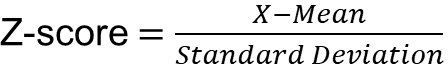

A second popular method is min-max normalization. This method ensures that all values fall in [0, 1] range.<br>
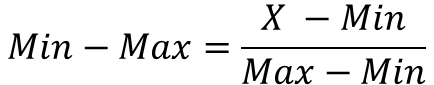

Here is an example of original values and transformed values using both methods.<br>
<table><tr><td>Original Values</td><td>Min-Max Normalized</td><td>Z-score Normalized</td></tr>
    <tr><td>1</td><td>0</td><td>-1.26</td></tr>
    <tr><td>2</td><td>0.25</td><td>-0.63</td></tr>
    <tr><td>3</td><td>0.5</td><td>0</td></tr>
    <tr><td>4</td><td>0.75</td><td>0.63</td></tr>
    <tr><td>5</td><td>1</td><td>1.26</td></tr>

Below we calculate the statistics that we need for each method.

In [11]:
pd.DataFrame(range(1,6)).describe()

,0
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Let's do it for x ``DataFrame``.

In [12]:
x

,A,B,C,D
0,1000,-100.0,60,-50
1,2000,0.0,20,-40
2,0,88.0,99,-77


In [13]:
pd.DataFrame([[x[c].min(), x[c].max(), x[c].mean(), x[c].std()] for c in x.columns],
             columns=['Min', 'Max', 'Mean', 'Std dev'],
             index=x.columns).transpose()

,A,B,C,D
Min,0.0,-100.000000,20.000000,-77.000000
Max,2000.0,88.000000,99.000000,-40.000000
Mean,1000.0,-4.000000,59.666667,-55.666667
Std dev,1000.0,94.063808,39.501055,19.139836


## Unit Scaling
Unit scaling applies z-score normalization. The result will have a mean of zero and standard deviation of 1.

In [14]:
(x-x.mean())/x.std()

,A,B,C,D
0,0.0,-1.020584,0.008439,0.296067
1,1.0,0.042524,-1.004193,0.818537
2,-1.0,0.978059,0.995754,-1.114604


In [15]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x) #Normalization: scale to a new distribution with mean=0 and stddev=1
x_scaled

array([[ 0.        , -1.24995479,  0.01033512,  0.36260608],
       [ 1.22474487,  0.05208145, -1.22987973,  1.00249915],
       [-1.22474487,  1.19787334,  1.2195446 , -1.36510523]])

In [16]:
scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
display('x', 'scaled_df')

,A,B,C,D
0,1000,-100.0,60,-50
1,2000,0.0,20,-40
2,0,88.0,99,-77
,A,B,C,D
0,0.000000,-1.249955,0.010335,0.362606
1,1.224745,0.052081,-1.229880,1.002499
2,-1.224745,1.197873,1.219545,-1.365105


In [17]:
scaled_df.mean(axis=0) # mean of columns

A    0.000000e+00
B    0.000000e+00
C    1.480297e-16
D   -1.480297e-16
dtype: float64

In [18]:
scaled_df.std(axis=0) # std of columns

A    1.224745
B    1.224745
C    1.224745
D    1.224745
dtype: float64

## Scaling to range
MinMaxScaler applies min-max scaling to data.

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
x_minmax = pd.DataFrame(min_max_scaler.fit_transform(x), columns=x.columns)
display('x', 'x_minmax')

,A,B,C,D
0,1000,-100.0,60,-50
1,2000,0.0,20,-40
2,0,88.0,99,-77
,A,B,C,D
0,0.5,0.000000,0.506329,0.72973
1,1.0,0.531915,0.000000,1.00000
2,0.0,1.000000,1.000000,0.00000


## Feature Encoding
Use LabelEncoder to convert textual categories to numeric categories. Works well when you have a textual binary dependent variable.

In [20]:
x = pd.DataFrame({'A': ['a', 'b', 'a', 'c', 'b'],
                 'B': ['M','F', 'F', 'M', 'F']})
x

,A,B
0,a,M
1,b,F
2,a,F
3,c,M
4,b,F


In [21]:
#converts string labels to numerical categories
le = preprocessing.LabelEncoder()  
le.fit(x['A'])
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [22]:
x_encoded = x.copy()
x_encoded['A']=le.transform(x['A'])
le.fit(x['B'])
x_encoded['B']=le.transform(x['B'])
display('x', 'x_encoded')

,A,B
0,a,M
1,b,F
2,a,F
3,c,M
4,b,F
,A,B
0,0,1
1,1,0
2,0,0
3,2,1
